<a href="https://colab.research.google.com/github/PedroHudson/PUC_MVP2/blob/main/MVP_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP - Machine Learning & Analytics**

1. Este projeto visa treinar dois modelos de Machine Learning, um modelo utilizando os métodos clássicos para um problema de classificação (Projeto A), e outro utilizando Deep Learning para um problema de linguagem natural (Projeto B).

**Projeto A**

**1. Definição do Problema:**


**2. Importação das Bibliotecas e Configurações.**

In [15]:
# Configuração para não exibir Warnings
import warnings
warnings.filterwarnings('ignore')

# Importação do Pandas
import pandas as pd

# Importação do Numpy
import numpy as np

# Importação do Seaborn
import seaborn as sns

# Importação do Pyplot
import matplotlib.pyplot as plt

# Importações dos modelos e configurações para treinamento do modelo, criação de pipelines, ensembles e para a apuração do resultado
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importações para Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Transformações Númericas

# Normalização
from sklearn.preprocessing import MinMaxScaler

# Padronização
from sklearn.preprocessing import StandardScaler



**3. Importação do Dataset.**

In [16]:
# Importando dados da url para um dataframe

# url a importar
url_dados = 'https://github.com/PedroHudson/diabetes/blob/main/diabetes.csv?raw=true'

# carga do dataset através da url
dataset = pd.read_csv(url_dados, sep=',')

**4. Análise Exploratória - Primeiras Visualizações e Análises.**

In [17]:
# Visualização da quantidade de instâncias e atributos do dataset
dataset.shape

(100000, 9)

In [18]:
# Visualização da quantidade de linhas por coluna
dataset.count()

gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

In [19]:
# Visualização dos tipos de dados
dataset.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [20]:
# Visualização das primeiras linhas do dataframe
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [21]:
# Visualização das últimas linhas do dataframe
dataset.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [22]:
# Visualiação da distribuição dos dados da coluna Diabetes
dataset_distrib = dataset['diabetes'].value_counts()/len(dataset)
dataset_distrib

0    0.915
1    0.085
Name: diabetes, dtype: float64

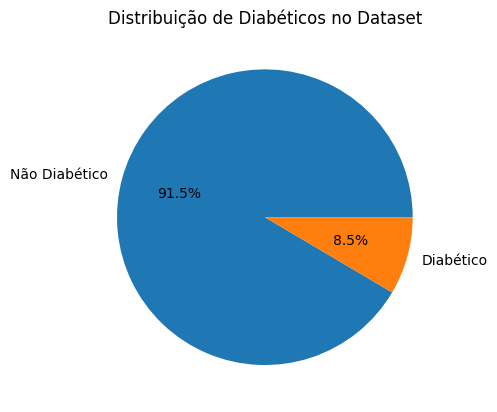

In [23]:
# Plotando gráfico de pizza para a visualização da distribuição
plt.pie(dataset_distrib, labels = ['Não Diabético', 'Diabético'],
       autopct = '%1.1f%%')
plt.title("Distribuição de Diabéticos no Dataset")
plt.show()

**5. Pré-processamento: (a) Balanceamento do Dataset; (b) Visualizações dos Dados Balanceados; (c) Primeira Seleção dos Atributos, Criação do novo Dataset; (d) Divisão do Dataset em Conjuntos de Treino e Teste; (e) Análise dos Atributos com SelectKBest; (f) Criação do Dataset Final.**

**(a) Balanceamento do Dataset.**

In [24]:
# Balanceamento do dataset
neg_diab = dataset[dataset['diabetes']==0].sample(8500)
pos_diab = dataset[dataset['diabetes']==1]
dataset_balanceado = pd.concat([neg_diab,pos_diab],axis=0)

**(b) Visualizações dos Dados Balanceados.**

In [25]:
# Visualização da distribuição dos dados da coluna Diabetes após o balanceamento
dataset_dist = dataset_balanceado['diabetes'].value_counts()/len(dataset)
dataset_dist

0    0.085
1    0.085
Name: diabetes, dtype: float64

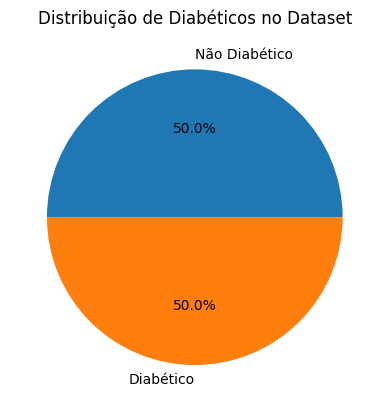

In [26]:
# Plotando gráfico de pizza para a visualização da nova distribuição
plt.pie(dataset_dist, labels = ['Não Diabético', 'Diabético'],
       autopct = '%1.1f%%')
plt.title("Distribuição de Diabéticos no Dataset")
plt.show()

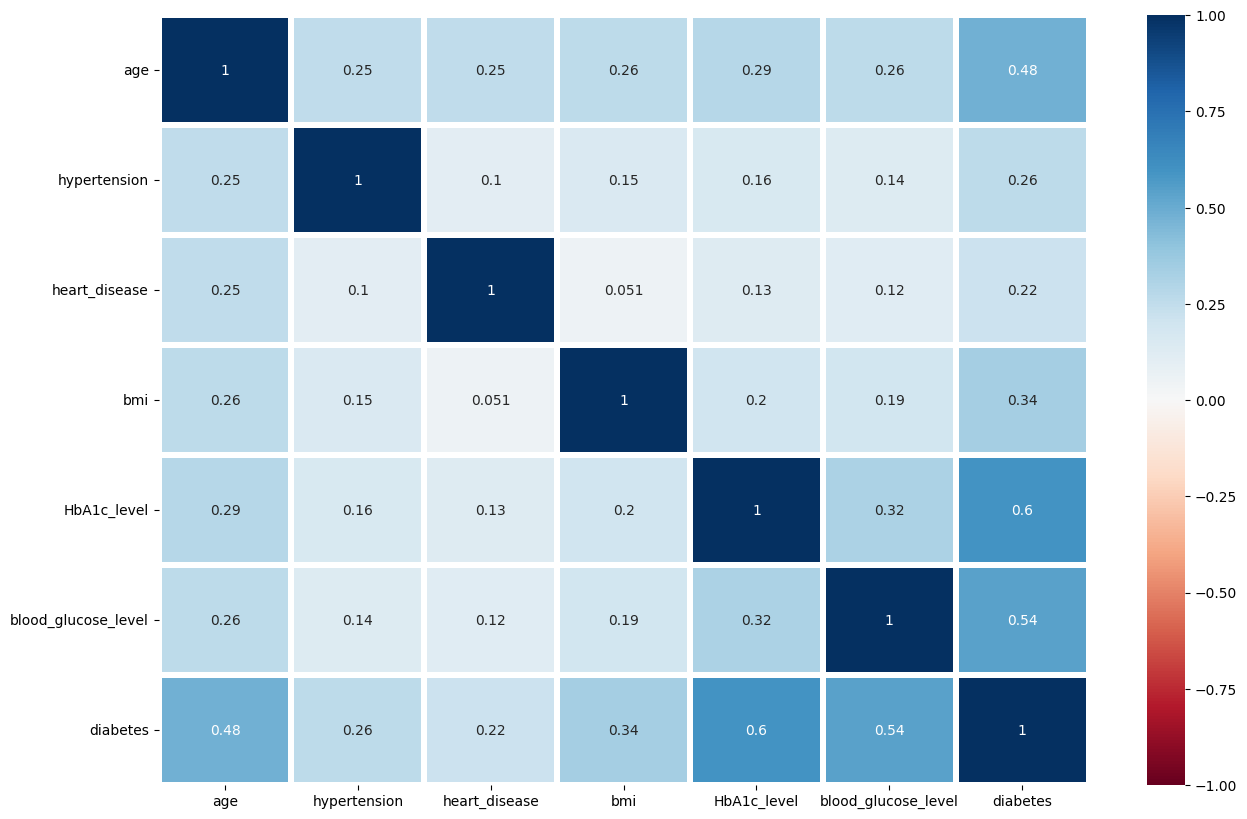

In [27]:
# Grafico de correlação com Seaborn
plt.figure(figsize = (15,10))
sns.heatmap(dataset_balanceado.corr(), annot=True, cmap= 'RdBu', vmin=-1, vmax=1, linewidths=3,linecolor='white');

**(c) Primeira Seleção dos Atributos, Criação do novo Dataset.**

In [28]:
# Seleção dos atributos para a criação do novo dataframe
dataset_novo = dataset_balanceado[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']]

**(d) Divisão do Dataset em Conjuntos de Treino e Teste.**

In [31]:
# Separação em bases de treino e teste (holdout)
array = dataset_novo.values
X = array[:,0:6]
y = array[:,6]

**(e) Análise dos Atributos com SelectKBest.**

In [32]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos originais
print("\nAtributos Originais:", dataset_novo.columns[0:6])

# Exibe as pontuações de cada atributo e os 4 escolhidos (com pontuação mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset_novo.columns[0:6]))


Número original de atributos: 6

Número reduzido de atributos: 4

Atributos Originais: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

Scores dos Atributos Originais: [5209.786 1224.261  830.286 2265.077 9470.955 7036.564]

Atributos Selecionados: ['age' 'bmi' 'HbA1c_level' 'blood_glucose_level']


**(f) Criação do Dataset Final.**

In [33]:
# Seleção das colunas para a criação do novo dataframe final.
dataset_final = dataset_novo[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']]